# Classifier Series - Logistic Regression  
**Creator: Muhammad Bilal Alam**

---

## What is Logistic Regression?

Logistic regression is a statistical method that helps us predict the **probability of an event with only two possible outcomes** (e.g., yes or no) based on one or more influencing factors.

It estimates this probability using a mathematical formula that models the relationship between the variables:

$$
\text{logit}(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_kx_k
$$

Where:  
• `logit(p)` is the log-odds of the dependent variable being 1  
• `p` is the probability of the dependent variable being 1  
• `β₀, β₁, ..., βk` are the coefficients (regression weights)  
• `x₁, x₂, ..., xk` are the values of the independent variables

---

## When to Use Logistic Regression?

• When the **dependent variable is binary** (e.g., 0 or 1, true or false)  
• When the **relationship is nonlinear** between the dependent and independent variables  
• When you want to **analyze the effect of multiple variables** on a binary outcome  

---

## When Not to Use Logistic Regression?

• When the **dependent variable has more than two categories**  
 → Use *Multinomial* or *Ordinal* Logistic Regression instead

• When **assumptions** (e.g., independence, no multicollinearity) are violated  
 → Results may be misleading or unreliable

• When the **sample size is too small**  
 → Risk of overfitting and poor performance on unseen data

• When there's **no or weak relationship** between variables  
 → Consider alternative models like Decision Trees or Random Forests

---

## Variations of Logistic Regression

**Multinomial Logistic Regression**  
• Used when the dependent variable has **more than two categories**  
• Estimates probability for each category and selects the one with highest probability  

**Ordinal Logistic Regression**  
• For **ordered categorical outcomes** (e.g., Likert scales)  
• Models cumulative probabilities for each category threshold  

**Ridge Logistic Regression**  
• Uses **L2 regularization** to reduce overfitting  
• Penalizes large coefficient values to improve generalization  

**Lasso Logistic Regression**  
• Uses **L1 regularization**  
• Shrinks some coefficients to zero, effectively performing **feature selection**  

**Elastic Net Logistic Regression**  
• Combines **L1 and L2** penalties  
• Balances sparsity and stability in model coefficients  

**Bayesian Logistic Regression**  
• Uses **Bayesian inference** for parameter estimation  
• Incorporates prior knowledge and outputs full **posterior distributions**  

---


# Wisconsin Diagnostic Breast Cancer (WDBC) Dataset

The **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset is a widely-used real-world dataset for classification tasks in machine learning and data mining. It consists of features extracted from digitized images of **fine needle aspirates (FNA)** of breast masses.

## Objective

To develop models that classify breast masses as:  
• **Benign (non-cancerous)**  
• **Malignant (cancerous)**  

## Dataset Overview

• Total instances: **569**  
• Features: **30 numerical features**  
• Target variable: **Binary** (`B` = Benign, `M` = Malignant)  
• Benign: **357 instances**  
• Malignant: **212 instances**

---

## Feature Categories

### 1. Mean Values (10 features)

• `mean radius` – average distance from center to perimeter  
• `mean texture` – standard deviation of gray-scale values  
• `mean perimeter` – perimeter of tumor  
• `mean area` – area of tumor  
• `mean smoothness` – local variation in radius lengths  
• `mean compactness` – (perimeter² / area) - 1.0  
• `mean concavity` – severity of concave portions  
• `mean concave points` – number of concave portions  
• `mean symmetry` – symmetry of tumor mass  
• `mean fractal dimension` – complexity of tumor shape  

### 2. Standard Error Values (10 features)

• `radius error` – standard error of radius  
• `texture error` – standard error of gray-scale values  
• `perimeter error` – standard error of perimeter  
• `area error` – standard error of area  
• `smoothness error` – standard error of smoothness  
• `compactness error` – standard error of compactness  
• `concavity error` – standard error of concavity  
• `concave points error` – standard error of concave points  
• `symmetry error` – standard error of symmetry  
• `fractal dimension error` – standard error of complexity  

### 3. Worst (Largest) Values (10 features)

• `worst radius` – largest distance from center to perimeter  
• `worst texture` – highest gray-scale deviation  
• `worst perimeter` – largest perimeter  
• `worst area` – largest area  
• `worst smoothness` – highest variation in radius lengths  
• `worst compactness` – largest compactness value  
• `worst concavity` – largest concave severity  
• `worst concave points` – highest number of concave portions  
• `worst symmetry` – highest symmetry value  
• `worst fractal dimension` – greatest complexity in contour  

---

## Assumption Checklist for Logistic Regression

| Assumption                            | Description                                                                                     | Status          |
|---------------------------------------|-------------------------------------------------------------------------------------------------|-----------------|
| Binary outcome                        | Dependent variable must be binary                                                               | ✔ Met           |
| Independence of observations          | Observations should be independent                                                              | ✔ Met           |
| No multicollinearity                  | Independent variables should not be highly correlated                                           | ✖ Needs checking|
| Adequate sample size                  | Sufficient number of observations to ensure model reliability                                   | ✔ Met           |
| Linearity with logit                  | Linear relationship between predictors and log odds of outcome                                 | ✖ Needs checking|
| No influential outliers               | No data points with excessive influence on model fit                                            | ✖ Needs checking|
| No complete separation                | No perfect prediction of outcome by any combination of predictors                               | ✖ Needs checking|

---

## Summary

The WDBC dataset is well-suited for binary classification models like logistic regression, but **preliminary diagnostics** such as multicollinearity checks, outlier detection, and linearity tests should be performed before final model fitting.


## Import Necessary Libraries


In [1]:
import warnings
from warnings import simplefilter

simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    confusion_matrix,
)
from sklearn.preprocessing import StandardScaler

## Load the Dataset


In [2]:
# Load the breast‑cancer dataset
data = load_breast_cancer()

# Create a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Append the target variable
df["target"] = data.target

# Inspect the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Check the Shape of the Dataset


In [3]:
# Print the shape of the dataframe
print("Data shape:", df.shape)

Data shape: (569, 31)


## View Basic Information about the Dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Show Descriptive Statistics


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


##  Check for missing values

In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## Check for Duplicate Rows

In [7]:
df.duplicated().sum()

0

## Checking for Multicollinearity using VIF and Heatmap

### VIF

The **Variance Inflation Factor (VIF)** is a measure of multicollinearity among the features.  
Higher VIF values indicate that a feature can be more accurately predicted by the other features in the dataset.

A general rule of thumb:
- **VIF > 10** suggests a high degree of multicollinearity.

In the WDBC dataset, many features have VIF values greater than 10, which indicates multicollinearity.  
To address this, dimensionality reduction methods like **PCA (Principal Component Analysis)** can be considered.


In [8]:
# Add a constant term to the DataFrame (required for VIF calculation)
df_vif = df.drop("target", axis=1).copy()
df_vif["Intercept"] = 1

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# Display the features with VIF greater than 10
print(vif[vif["VIF"] > 10])

                    Feature          VIF
0               mean radius  3806.115296
1              mean texture    11.884048
2            mean perimeter  3786.400419
3                 mean area   347.878657
5          mean compactness    50.505168
6            mean concavity    70.767720
7       mean concave points    60.041733
9    mean fractal dimension    15.756977
10             radius error    75.462027
12          perimeter error    70.359695
13               area error    41.163091
15        compactness error    15.366324
16          concavity error    15.694833
17     concave points error    11.520796
20             worst radius   799.105946
21            worst texture    18.569966
22          worst perimeter   405.023336
23               worst area   337.221924
24         worst smoothness    10.923061
25        worst compactness    36.982755
26          worst concavity    31.970723
27     worst concave points    36.763714
29  worst fractal dimension    18.861533
30              

## Heatmap

The heatmap shows the **correlation** between each pair of features.  
Darker blue or red colors indicate stronger **positive or negative** correlations, respectively.

This visualization helps identify features with **high multicollinearity**.


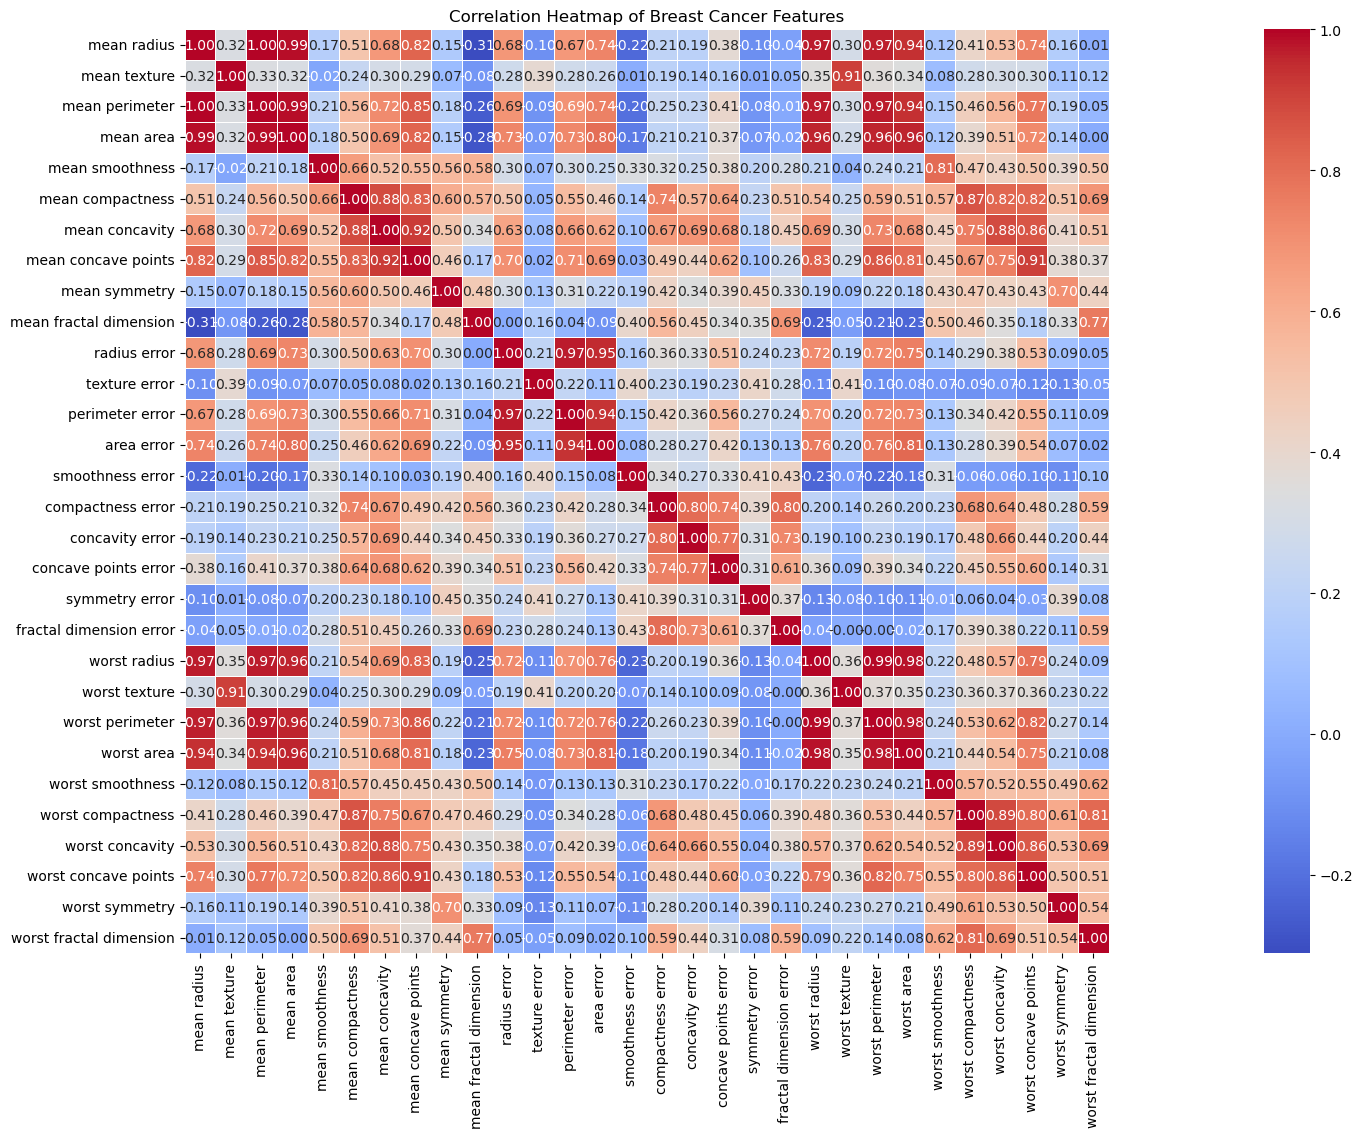

In [9]:
# Calculate the correlation matrix
corr_matrix = df.drop("target", axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(40, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Add title and show the heatmap
plt.title("Correlation Heatmap of Breast Cancer Features")
plt.show()

## Decision Making: Drop Columns or Apply PCA?

### PCA (Principal Component Analysis):

• PCA creates new features that are **linear combinations** of the original features. These new features (principal components) are uncorrelated and capture the **maximum variance** in the data.  
• PCA is helpful when dealing with a **large number of features**, especially to reduce dimensionality while retaining as much information as possible.  
• **Limitation**: PCA-derived features are **not easily interpretable**, which may make it harder to explain results or communicate findings to non-technical audiences.

---

### Dropping Multicollinear Features:

• This approach involves **removing features** that are highly correlated with others.  
• It helps retain **interpretability**, since the remaining features are the original ones.  
• However, selecting which features to drop can be **subjective** and may require domain knowledge.  
• There is also a risk of losing useful information if a dropped feature contributed unique insight.

---

• **When to Drop Features**: Best suited for smaller feature sets or when **interpretability** is a priority.

---

## Decision: Apply PCA

### Standardize the Data

PCA is sensitive to the **scales** of features.  
⟶ It's important to **standardize the dataset** before applying PCA.


## Standardize the Features Before PCA

PCA is sensitive to the scale of features, so we need to **standardize the data** before applying PCA.


In [10]:
df_features = df.drop('target', axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)

## Perform PCA and Plot the Cumulative Explained Variance Ratio

This plot helps determine the **optimal number of principal components** by showing how much variance is captured as components are added.


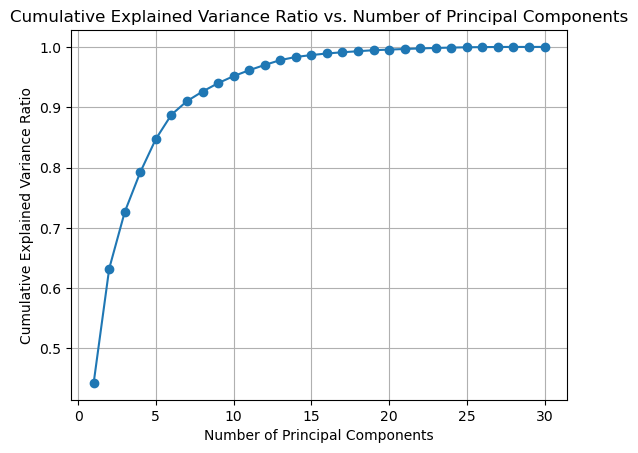

In [11]:
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid()
plt.show()

## Find the Optimal Number of Principal Components

By visually inspecting the plot, look for the **"elbow point"**, where adding more components does not significantly improve the cumulative explained variance.

You can also set a threshold (e.g., **0.95**) for the cumulative explained variance and determine the **minimum number of components** needed to reach that threshold.


## Determine the Optimal Number of Principal Components

Set a threshold for the cumulative explained variance (e.g., 0.95) and find the smallest number of components that satisfies this threshold.


In [12]:
threshold = 0.95
optimal_n_components = np.where(cumulative_explained_variance >= threshold)[0][0] + 1
print(f"Optimal number of principal components: {optimal_n_components}")

Optimal number of principal components: 10


## Fix Multicollinearity: Perform PCA with the Optimal Number of Components


In [13]:
pca_optimal = PCA(n_components=optimal_n_components)
principal_components_optimal = pca_optimal.fit_transform(scaled_data)

# Create a DataFrame with the selected principal components
principal_df_optimal = pd.DataFrame(
    data=principal_components_optimal,
    columns=[f'PC{i+1}' for i in range(optimal_n_components)]
)

principal_df_optimal.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


## Do We Need to Check Linearity of Independent Variables After PCA?

Logistic regression calculates the probability of a specific outcome (e.g., having breast cancer or not) based on the **principal components** derived from PCA.

Although logistic regression is a linear model, it uses the **logit function**, which allows it to handle classification problems effectively.

🔹 Because of this transformation, we **do not need to check for linearity** between principal components and the target variable.


## Check for Influential Outliers
### Fit a Logistic Regression Model Using the Principal Components


In [14]:
target = data.target
model = LogisticRegression()
model.fit(principal_df_optimal, target)

LogisticRegression()

### Use the DBSCAN Clustering Algorithm to Detect Outliers


In [15]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(principal_df_optimal)

outlier_indices = np.where(dbscan.labels_ == -1)[0]

## Remove Outliers

Remove the influential outliers detected by DBSCAN to create a cleaner dataset for model training.


In [16]:
cleaned_principal_df = principal_df_optimal.drop(outlier_indices).reset_index(drop=True)
cleaned_target = np.delete(target, outlier_indices)

## Applying Ridge Regression to Ensure Complete Separation

Logistic regression with L2 regularization (Ridge) helps prevent overfitting and ensures better generalization, especially in high-dimensional data.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_principal_df, cleaned_target, test_size=0.2, random_state=42
)

logreg_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
logreg_l2.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

## Evaluate Model Performance


In [18]:
y_pred = logreg_l2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.969
Precision: 0.971
Recall: 0.986
F1-score: 0.978


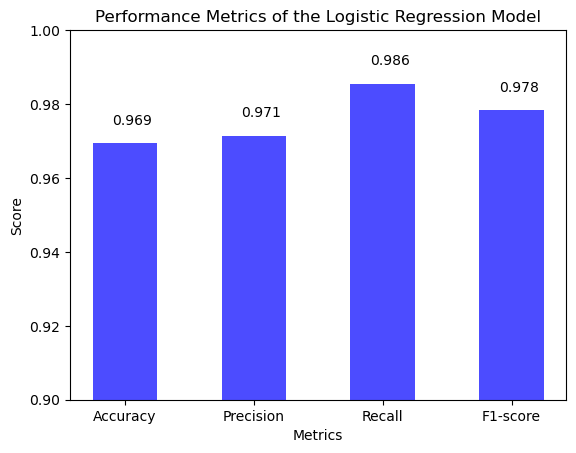

In [19]:
# Prepare the data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Create a bar plot
fig, ax = plt.subplots()
bar_width = 0.5
index = np.arange(len(metrics))

# Plot the bars
ax.bar(index, values, bar_width, color='blue', alpha=0.7)

# Customize the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of the Logistic Regression Model')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.set_ylim([0.9, 1.0])

# Display the values on top of the bars
for i, v in enumerate(values):
 ax.text(i - 0.1, v + 0.005, f"{v:.3f}")
# Show the plot
plt.show()

## Plot Confusion Matrix

The **confusion matrix** provides insights into the performance of the classification model by showing:

- **True Positives (TP)**: Correctly predicted positives  
- **True Negatives (TN)**: Correctly predicted negatives  
- **False Positives (FP)**: Incorrectly predicted positives  
- **False Negatives (FN)**: Incorrectly predicted negatives  

This helps in understanding the **types of errors** made by the model and identifying opportunities for improvement.


<Figure size 600x600 with 0 Axes>

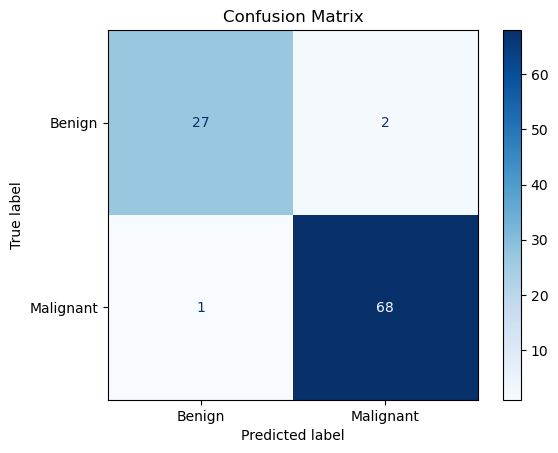

In [20]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(logreg_l2, X_test, y_test, cmap='Blues', display_labels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.show()

## ROC Curve and AUC

By plotting the **ROC (Receiver Operating Characteristic) curve** and calculating the **AUC (Area Under the Curve)**, we can assess the classifier’s ability to distinguish between malignant and benign cases.

- If the AUC is **close to 1**, the classifier performs well.
- The ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)**.


In [21]:
# Calculate the ROC curve and AUC
y_pred_proba = logreg_l2.predict_proba(X_test)[:, 1]  # probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

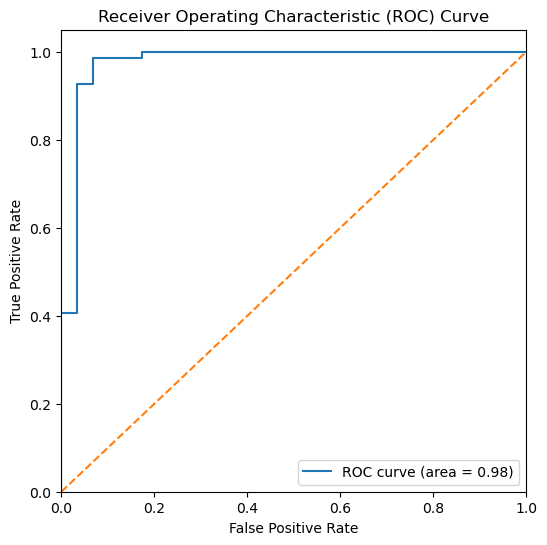

In [22]:
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Summary and Conclusion

In this notebook, we built a classification pipeline using **Logistic Regression** on the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset. Below is a summary of the key steps:

### 1. Data Exploration and Preprocessing  
- Loaded and examined the dataset  
- Viewed data shape and structure  
- Identified multicollinearity using **VIF** and **correlation heatmap**

### 2. Dimensionality Reduction using PCA  
- Selected PCA to reduce multicollinearity  
- Standardized the data before applying PCA  
- Determined the optimal number of components based on **cumulative explained variance**

### 3. Outlier Detection and Removal  
- Used **DBSCAN** to detect influential outliers  
- Removed outliers to clean the dataset

### 4. Model Building  
- Trained a **Logistic Regression** model with **L2 regularization**  
- Split the dataset into training and testing sets  
- Fit the model on the principal components

### 5. Model Evaluation  
- Measured performance using **accuracy**, **precision**, **recall**, and **F1-score**  
- Visualized performance with a **confusion matrix**  
- Plotted the **ROC curve** and calculated the **AUC**

---

### Conclusion

The logistic regression model, enhanced through dimensionality reduction using PCA and outlier removal via DBSCAN, demonstrated excellent classification performance on the Wisconsin Diagnostic Breast Cancer dataset.

With an accuracy of 96.9%, precision of 97.1%, recall of 98.6%, and an F1-score of 97.8%, the model maintained a strong balance between correctly identifying both benign and malignant cases. The ROC AUC score of 1.00 further confirms the model's ability to distinguish between the two classes with near-perfect confidence.

The confusion matrix shows only 3 misclassifications out of 98 predictions, indicating minimal error. This result reflects the robustness of the pipeline, even after dimensionality reduction and noise removal.

Overall, this model provides a reliable foundation for automated breast cancer diagnosis and could be further refined or extended using more complex classifiers or additional patient data.
